

<img src="https://drive.google.com/uc?export=view&id=1wpQMFbiopOgqZ8MMseUDCorEhxWVu9FM" width="450" height="400" align='right' />


## Amirkabir Artificial Intelligence Summer Summit

### Generative Adversarial Networks Workshop



#### Mohammad Rahmdel

www.github.com/Mohammad-Rahmdel


##### Amirkabir Artificial Intelligence Summer Summit
##### Computer Engineering Department of Amirkabir University of Technology




In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pylab as plt
from sklearn.datasets import make_blobs
import timeit
import matplotlib.animation as animation

%matplotlib inline

In [2]:
tf.random.set_seed(4)

### Creating dataset

In [3]:
cntrs = [[-2,-3],[10,0],[5,8]]

In [4]:
n = 2000
data, _ = make_blobs(n_samples=n, centers=cntrs, n_features=2, random_state=3)
print(data.shape)

(2000, 2)


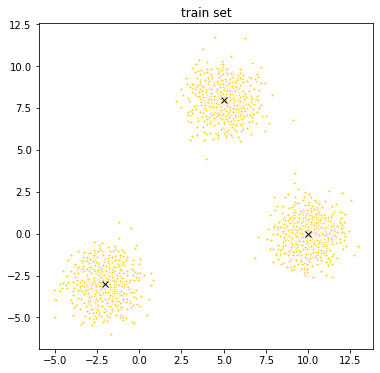

In [5]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1)

ax.plot(data[:, 0], data[:, 1], 'w', markerfacecolor='#ffcc00', marker='.')
ax.plot(cntrs[0][0], cntrs[0][1], 'x', markeredgecolor='k', markersize=6)
ax.plot(cntrs[1][0], cntrs[1][1], 'x', markeredgecolor='k', markersize=6)
ax.plot(cntrs[2][0], cntrs[2][1], 'x', markeredgecolor='k', markersize=6)

ax.set_title('train set')

plt.show()

In [6]:
k = 2.5
h = 0.1

xmin = min(data[:,0])
xmax = max(data[:,0])
ymin = min(data[:,1])
ymax = max(data[:,1])

x_min, x_max = xmin - k, xmax + k
y_min, y_max = ymin - k, ymax + k

In [7]:
#### normalizing to 0-1
X = np.zeros_like(data)
X[:,0] = (data[:,0] - x_min) / (x_max - x_min)
X[:,1] = (data[:,1] - y_min) / (y_max - y_min)

X = X.astype('float32')

In [8]:
def normalize(X):
    X = X.numpy()
    X[:,0] = (X[:,0] - x_min) / (x_max - x_min)
    X[:,1] = (X[:,1] - y_min) / (y_max - y_min)
    X = X.astype("float32")
    return X

## Networks
### Generator

In [9]:
N_Z = 64
gen = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1 * 1 * 64, activation="relu", input_shape=(N_Z,)),
    tf.keras.layers.Dense(units=4 * 4, activation="relu"),
    tf.keras.layers.Dense(units=2, activation="sigmoid")
])
gen.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 34        
Total params: 5,234
Trainable params: 5,234
Non-trainable params: 0
_________________________________________________________________


### Discriminator

In [10]:
DIMS = (2)

disc = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=DIMS),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=100, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid') ### output is a probability
])
disc.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 2)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               300       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 1,321
Trainable params: 1,321
Non-trainable params: 0
_________________________________________________________________


In [11]:
### save weights
g_weights = gen.get_weights()
d_weights = disc.get_weights()

In [12]:
# denormalizing - undo preprocessing
def denormalize(X):
    
    X = X.numpy()
    X[:,0] = X[:,0] * (x_max - x_min) + x_min
    X[:,1] = X[:,1] * (y_max - y_min) + y_min
    
    return X

## Visualizations

In [13]:
def generate_and_plot():
    z_samp = tf.random.normal([n, N_Z])
    x_gen = gen(z_samp)
    x_gen = denormalize(x_gen)
    
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(1, 1, 1)

    r = ax.scatter(data[:, 0], data[:, 1], 4, alpha=0.5, c='#e60000',  marker='.')
    f = ax.scatter(x_gen[:, 0], x_gen[:, 1], 4, alpha=0.5, c='#2929a3',  marker='.')
    ax.plot(cntrs[0][0], cntrs[0][1], 'o', markeredgecolor='k', markersize=8)
    ax.plot(cntrs[1][0], cntrs[1][1], 'o', markeredgecolor='k', markersize=8)
    ax.plot(cntrs[2][0], cntrs[2][1], 'o', markeredgecolor='k', markersize=8)
    plt.legend([r, f], ['real', 'fake'], markerscale=7, loc='upper left',fontsize=12)
    plt.show()


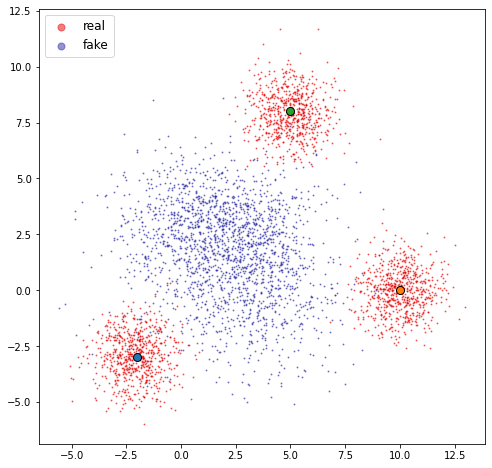

In [14]:
generate_and_plot()

In [15]:
dist = np.zeros(shape=(3,2))
for i in range(data.shape[0]):
    d1 = np.linalg.norm(data[i] - cntrs[0])
    d2 = np.linalg.norm(data[i] - cntrs[1])
    d3 = np.linalg.norm(data[i] - cntrs[2])
    
    label = np.argmin([d1, d2, d3])
    distance = np.min([d1, d2, d3])
    dist[label, 0] += distance
    dist[label, 1] += 1
    
radius = np.zeros(shape=(3))
for i in range(3):
    radius[i] = dist[i, 0] / dist[i, 1]
    
radius += 0.5

In [16]:
def visualize(k=2.5):
    circle1 = plt.Circle(cntrs[0], radius[0], color='#339966', lw=2, fill=False)
    circle2 = plt.Circle(cntrs[1], radius[1], color='#339966', lw=2, fill=False)
    circle3 = plt.Circle(cntrs[2], radius[2], color='#339966', lw=2, fill=False)

    ### real data
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(1, 1, 1)
    plt.gcf().gca().add_artist(circle1)
    plt.gcf().gca().add_artist(circle2)
    plt.gcf().gca().add_artist(circle3)

    real = ax.scatter(data[:, 0], data[:, 1], 4, alpha=0.5, c='#800000',  marker='.') ##  #e60000
    ax.plot(cntrs[0][0], cntrs[0][1], 'o', markeredgecolor='k', markersize=5)
    ax.plot(cntrs[1][0], cntrs[1][1], 'o', markeredgecolor='k', markersize=5)
    ax.plot(cntrs[2][0], cntrs[2][1], 'o', markeredgecolor='k', markersize=5)


    ### discriminator
#     k = 2.5
    x_min, x_max = xmin - k, xmax + k
    y_min, y_max = ymin - k, ymax + k
    h = 0.1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    xx = (xx - xmin) / (xmax - xmin)
    yy = (yy - ymin) / (ymax - ymin)
    
    z = np.c_[xx.ravel(), yy.ravel()]
    z = z.astype('float32')
    d_pred = disc(z)
    d_pred = tf.reshape(d_pred, xx.shape)
    plt.imshow(d_pred, vmin = 0., vmax = 1., cmap=plt.cm.coolwarm, origin='lower', alpha=0.7, ## Greens, Wistia, hot
               extent=[x_min, x_max, y_min, y_max])


    ### generator - fake data
    z_samp = tf.random.normal([n, N_Z])
    x_gen = gen(z_samp)
    x_gen = denormalize(x_gen)

    fake = ax.scatter(x_gen[:, 0], x_gen[:, 1], 4, alpha=0.5, c='#1f1f7a', marker='.')

    plt.legend([real, fake], ['real', 'fake'], markerscale=7, loc='upper left',fontsize=12)

    plt.ylabel('Y')
    plt.xlabel('X')
    
    cbar = plt.colorbar(orientation='vertical')
    cbar.ax.set_yticklabels(['0 (fake)','0.2','0.4','0.6','0.8','1(real)'], fontsize=13)
    cbar.set_label('Discriminator output', rotation=270, fontsize=15)

    plt.show()

#### before training!

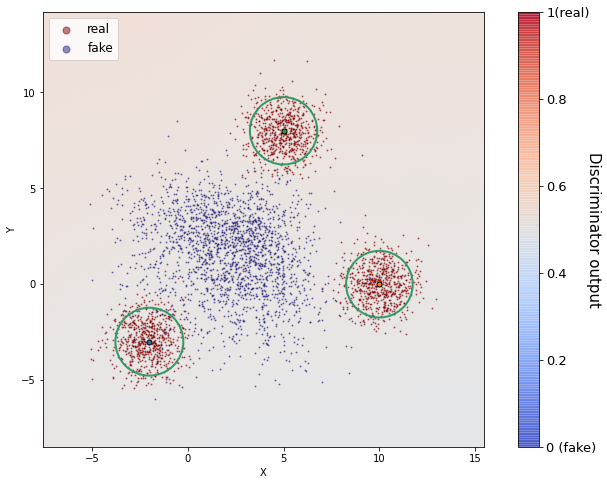

In [17]:
visualize()

# Training


<img src="https://drive.google.com/uc?export=view&id=1bAx6p65IXnc07iiAIFxWalnh77JN3UAV"  width="800" height="500"/>


### optimizer

In [18]:
gen_optimizer = tf.keras.optimizers.Adam(0.001, beta_1=0.5)
disc_optimizer = tf.keras.optimizers.Adam(0.001, beta_1=0.5)

In [19]:
batch_size = 256

In [20]:
print(type(X))

train_dataset = (
    tf.data.Dataset.from_tensor_slices(X)
    .shuffle(n)
    .batch(batch_size)
)
print(type(train_dataset))

<class 'numpy.ndarray'>
<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>


### Loss Function

#### Binary Cross-Entropy (Sigmoid Cross-Entropy) 

$ -\frac{1}{N}\sum_{i=1}^N [y_i \log(\hat{y}_i)+(1-y_i) \log(1-\hat{y}_i)] $

In [21]:
def GAN_loss(y_true, y_pred):
    return tf.keras.losses.binary_crossentropy(y_true, y_pred)

In [22]:
print(GAN_loss([1,0],[0.5, 0.5]).numpy())
print(GAN_loss([1,1],[0.99, 0.99]).numpy())
print(GAN_loss([1,1],[0.01, 0.01]).numpy())

0.69314694
0.0100502055
4.60516


### one step(epoch) of training



<img src="https://drive.google.com/uc?export=view&id=1qXellHhsg0X6_SUcEk6x6NsE_mkHSkuy"  width="750" height="450"/>


In [23]:
@tf.function
def train_step(x):
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        
        z_samp = tf.random.normal([x.shape[0], N_Z])

        x_gen = gen(z_samp)

        D_fake = disc(x_gen)
        D_real = disc(x)

        D_loss = GAN_loss(tf.ones_like(D_real), D_real) + GAN_loss(tf.zeros_like(D_fake), D_fake)
        G_loss = GAN_loss(tf.ones_like(D_fake), D_fake)
        
    G_gradients = gen_tape.gradient(G_loss, gen.trainable_variables)
    D_gradients = disc_tape.gradient(D_loss, disc.trainable_variables)
    
    gen_optimizer.apply_gradients(
    zip(G_gradients, gen.trainable_variables)
    )
    disc_optimizer.apply_gradients(
        zip(D_gradients, disc.trainable_variables)
    )
    
    return D_loss, G_loss


<img src="https://drive.google.com/uc?export=view&id=1QHEY347SPUnE8Qk7eScYC4W9wVOM_wik"  width="1050" height="150"/>


In [24]:
GLosses = []
DLosses = []

def train(n_epochs=1, print_=False):

    for epoch in range(n_epochs):
        Gloss = []
        Dloss = []
        for batch in train_dataset:
            D_loss, G_loss = train_step(batch)
   
            Gloss.append(tf.reduce_mean(G_loss))
            Dloss.append(tf.reduce_mean(D_loss))
            
        GLosses.append(np.mean(Gloss))
        DLosses.append(np.mean(Dloss))
        
        if print_:
            print(
            "Epoch: {} | disc_loss: {} | gen_loss: {}".format(
                epoch, DLosses[-1], GLosses[-1]
            ))

In [25]:
train(5, print_=True)

Epoch: 0 | disc_loss: 1.3863706588745117 | gen_loss: 0.666534960269928
Epoch: 1 | disc_loss: 1.384690761566162 | gen_loss: 0.6955119371414185
Epoch: 2 | disc_loss: 1.3856920003890991 | gen_loss: 0.708105206489563
Epoch: 3 | disc_loss: 1.3830879926681519 | gen_loss: 0.7213661074638367
Epoch: 4 | disc_loss: 1.3883930444717407 | gen_loss: 0.7170059680938721


In [26]:
train(1000)

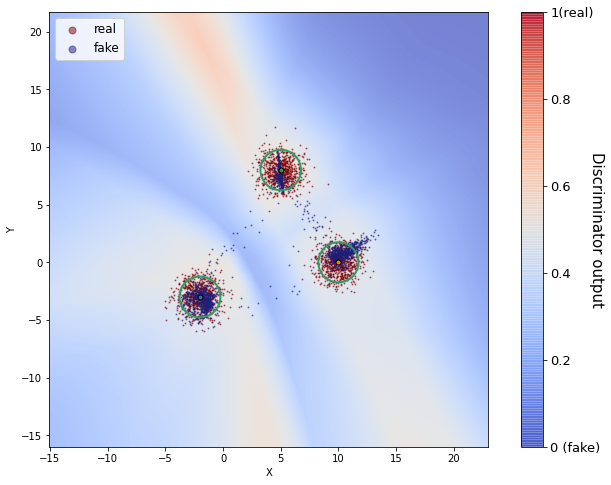

In [27]:
visualize(k=10)

### Convergence

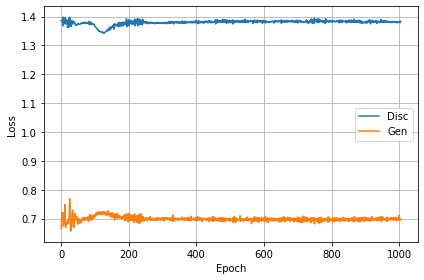

In [29]:
plt.plot(DLosses, label="Disc")
plt.plot(GLosses, label="Gen")

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.tight_layout()
plt.legend(loc=5)
plt.show()


<img src="https://drive.google.com/uc?export=view&id=1rEGZ-Isqkw6n_gQtUvJ9D3tP2Ue5NxSB"  width="800" height="500"/>


In [30]:
z_samp = tf.random.normal([10, N_Z])
x_gen = gen(z_samp)
D_fake = disc(x_gen)
for b in train_dataset:
    D_real = disc(b)

print('fake samples: \n', D_fake.numpy().T)
print('real samples: \n', D_real[:10].numpy().T)

fake samples: 
 [[0.4731768  0.50318044 0.47351673 0.47314224 0.50923425 0.47317365
  0.509707   0.5031718  0.50909805 0.4734923 ]]
real samples: 
 [[0.50884855 0.5035763  0.50319546 0.5161187  0.5033141  0.47273535
  0.47334167 0.47328803 0.4733423  0.5071801 ]]


### tf.function decorator

In [31]:
def train_step2(x): ### train_step without @tf.function
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        
        z_samp = tf.random.normal([x.shape[0], N_Z])

        x_gen = gen(z_samp)

        D_fake = disc(x_gen)
        D_real = disc(x)

        D_loss = GAN_loss(tf.ones_like(D_real), D_real) + GAN_loss(tf.zeros_like(D_fake), D_fake)
        G_loss = GAN_loss(tf.ones_like(D_fake), D_fake)
        
    G_gradients = gen_tape.gradient(G_loss, gen.trainable_variables)
    D_gradients = disc_tape.gradient(D_loss, disc.trainable_variables)
    
    gen_optimizer.apply_gradients(
    zip(G_gradients, gen.trainable_variables)
    )
    disc_optimizer.apply_gradients(
        zip(D_gradients, disc.trainable_variables)
    )
    
    return D_loss, G_loss


def train1(n_epochs=1):
    for epoch in range(n_epochs):
        Gloss = Dloss = []
        for batch in train_dataset:
            _, _ = train_step(batch)
            
def train2(n_epochs=1):
    for epoch in range(n_epochs):
        Gloss = Dloss = []
        for batch in train_dataset:
            _, _ = train_step2(batch)

In [32]:
print("Total Train Time:", timeit.timeit(lambda: train1(100), number=1))
print("Total Train Time:", timeit.timeit(lambda: train2(100), number=1))

Total Train Time: 2.4218014890000177
Total Train Time: 14.599918658999968


## Animation

In [43]:
from matplotlib import rc
rc('animation', html='jshtml')

# %matplotlib tk

In [35]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
z = np.c_[xx.ravel(), yy.ravel()]
z = z.astype('float32')

In [37]:
def draw(i, plot_interval, epoch, d, f, ax):
    
    ### train for plot_interval times
    train(plot_interval, False)
    d_pred = disc(z)
    d_pred = tf.reshape(d_pred, xx.shape)
    ### redraw discriminator prob
    d.set_array(d_pred)

    ### generate new data and rescatter
    z_samp = tf.random.normal([n, N_Z])
    x_gen = gen(z_samp)
    x_gen = denormalize(x_gen)
    f.set_offsets(np.c_[x_gen[:, 0], x_gen[:, 1]])
    
    ### update epoch number
    ax.set_title('epoch: ' + str(epoch + i * plot_interval + plot_interval))

In [38]:
def train_and_plot(plot_interval=1, epoch=0, frames=1000, interval=200):
    
    pause = True
    def onClick(event): 
        nonlocal pause
        if pause==True:
            pause = False
            anime.event_source.stop()
        else:
            pause = True
            anime.event_source.start()
        
    circle1 = plt.Circle(cntrs[0], radius[0], color='#339966', lw=2, fill=False)
    circle2 = plt.Circle(cntrs[1], radius[1], color='#339966', lw=2, fill=False)
    circle3 = plt.Circle(cntrs[2], radius[2], color='#339966', lw=2, fill=False)

    ### real data
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(1, 1, 1)

    plt.gcf().gca().add_artist(circle1)
    plt.gcf().gca().add_artist(circle2)
    plt.gcf().gca().add_artist(circle3)

    real = ax.scatter(data[:, 0], data[:, 1], 4, alpha=0.5, c='#800000',  marker='.') ##  #e60000
    ax.plot(cntrs[0][0], cntrs[0][1], 'o', markeredgecolor='k', markersize=5)
    ax.plot(cntrs[1][0], cntrs[1][1], 'o', markeredgecolor='k', markersize=5)
    ax.plot(cntrs[2][0], cntrs[2][1], 'o', markeredgecolor='k', markersize=5)

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    z = np.c_[xx.ravel(), yy.ravel()]
    z = z.astype('float32')
    
    ### draw discriminator output
    d_pred = disc(z)
    d_pred = tf.reshape(d_pred, xx.shape)
    d = plt.imshow(d_pred, vmin = 0., vmax = 1., cmap=plt.cm.coolwarm, origin='lower', alpha=0.7,
               extent=[x_min, x_max, y_min, y_max])


    ### generator - fake data
    z_samp = tf.random.normal([n, N_Z])
    x_gen = gen(z_samp)
    x_gen = denormalize(x_gen)

    f = ax.scatter(x_gen[:, 0], x_gen[:, 1], 4, alpha=0.5, c='#1f1f7a', marker='.')

    plt.legend([real, f], ['real', 'fake'], markerscale=7, loc='upper left',fontsize=12)

    plt.ylabel('Y')
    plt.xlabel('X')
    
    cbar = plt.colorbar(orientation='vertical')
    cbar.ax.set_yticklabels(['0 (fake)','0.2','0.4','0.6','0.8','1(real)'], fontsize=13)
    cbar.set_label('Discriminator Output', rotation=270, fontsize=15)
    
    
    ### play/pause with mouse click
    fig.canvas.mpl_connect('button_press_event', onClick) 

    anime = animation.FuncAnimation(fig, draw, fargs=(plot_interval, epoch, d, f, ax), frames=frames, interval=interval, repeat=False) 
    
    return anime

In [ ]:
gen.set_weights(g_weights) ### reset the weights
disc.set_weights(d_weights)

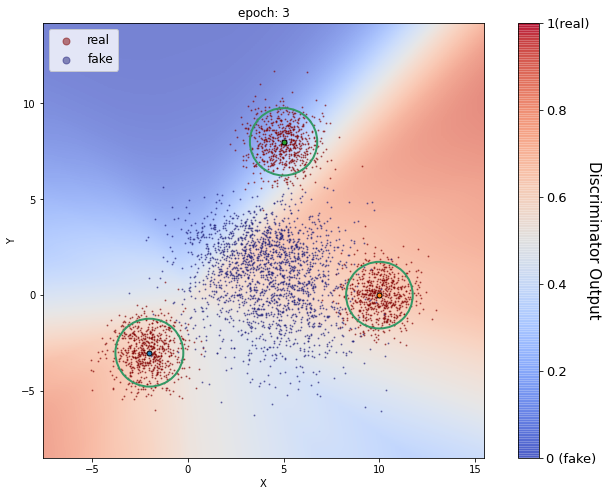

In [44]:
anim = train_and_plot(plot_interval=3, epoch=0, frames=60, interval=400)